In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from spafe.features.pncc import pncc

In [2]:
df = pd.read_csv('./coconut-maturity-dataset-wav-luar-kotak.csv')
df

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


In [3]:
pnccs = []
vector_size = []

for filename in df['full_path'].values:
    wavSig, sampRate = librosa.load(filename)
    result = pncc(wavSig, fs=sampRate)
    pnccs.append(result)
    vector_size.append(result.shape)

d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: invalid value encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:169: RuntimeWarning: divide by zero encountered in scalar divide
  [R_tilde[m, lprime] / Q_tilde[m, lprime] for lprime in range(l1, l2)]
d:\Cool Yeah\Semester 118\coconut-maturity-classification\envSkripsi\lib\site-packages\spafe\features\pncc.py:437: RuntimeWarning: invalid value encountered in multiply
  T = P * S_tilde


In [4]:
df_13 = df.copy()
df_13['feature_array'] = pnccs
df_13['feature_array_size'] = vector_size

df_13

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature,"[[1.9822215851057952, -0.3148358106033424, 0.0...","(98, 13)"
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","(98, 13)"


In [5]:
df_13_cut = df_13[df_13['feature_array'].apply(lambda x: not np.isnan(x).any())]
df_13_cut

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
158,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)"
162,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.3603752471296788, -0....","(98, 13)"
174,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.4485276294821634, 0.0...","(98, 13)"
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"


In [6]:
df_13_cut.reset_index(drop=True, inplace=True)
df_13_cut

,full_path,file_name,class_name,feature_array,feature_array_size
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature,"[[2.000098246886966, -0.32312278051968846, 0.0...","(98, 13)"
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature,"[[2.03020507353705, -0.3081231693218536, 0.023...","(98, 13)"
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature,"[[2.053201586789632, -0.30926271900245395, 0.0...","(98, 13)"
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature,"[[2.1524977561943794, -0.2745882742675701, -0....","(98, 13)"
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature,"[[2.085433271523342, -0.3482630528427392, -0.0...","(98, 13)"
...,...,...,...,...,...
134,./Sample-kelapa/data/cut_sample/tua/wav/tua2c.wav,tua2c.wav,overmature,"[[2.021531665614917, -0.32578074400792156, 0.0...","(98, 13)"
135,./Sample-kelapa/data/cut_sample/tua/wav/tua4a.wav,tua4a.wav,overmature,"[[2.1749682479502663, -0.3603752471296788, -0....","(98, 13)"
136,./Sample-kelapa/data/cut_sample/tua/wav/tua8a.wav,tua8a.wav,overmature,"[[2.1839039600808268, -0.4485276294821634, 0.0...","(98, 13)"
137,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature,"[[2.0537136283217605, -0.3141183737907519, 0.0...","(98, 13)"


In [9]:
stacked_data = np.stack(df_13_cut['feature_array'].values)
flattened_data = stacked_data.reshape((139, -1))
flattened_data.shape

(139, 1274)

In [10]:
flattened_data

array([[ 2.00009825, -0.32312278,  0.01555734, ..., -0.02381299,
        -0.00239147, -0.0128392 ],
       [ 2.03020507, -0.30812317,  0.02398461, ...,  0.02020309,
         0.00704723, -0.00871633],
       [ 2.05320159, -0.30926272,  0.01039622, ..., -0.03984898,
        -0.03833099,  0.00736322],
       ...,
       [ 2.18390396, -0.44852763,  0.05438186, ...,  0.02026838,
        -0.0334837 , -0.00424015],
       [ 2.05371363, -0.31411837,  0.05745585, ..., -0.00314553,
         0.0140358 ,  0.01065347],
       [ 1.98222159, -0.31483581,  0.06184773, ...,  0.04301863,
        -0.04663459, -0.00559342]])

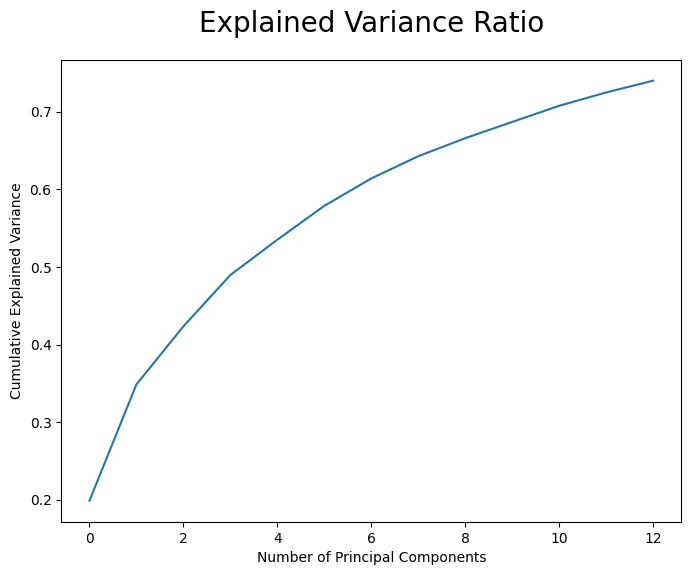

In [11]:
# stacked_data = np.stack(df_13_cut['feature_array'].values)
# data_reshaped = np.reshape(stacked_data, (139, 98*13))

pca = PCA(n_components=13)
pca.fit(flattened_data)
pca_result = pca.transform(flattened_data)

plt.subplots(figsize = (8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio', fontsize=20, pad=20)
plt.show()

In [40]:
x = pca_result[:, 0]
y = pca_result[:, 1]

x.shape

(139,)

In [41]:
data_points = np.array([[2, 3], [1, 5], [3, 4], [6, 2], [7, 4]])
data_points.shape

(5, 2)

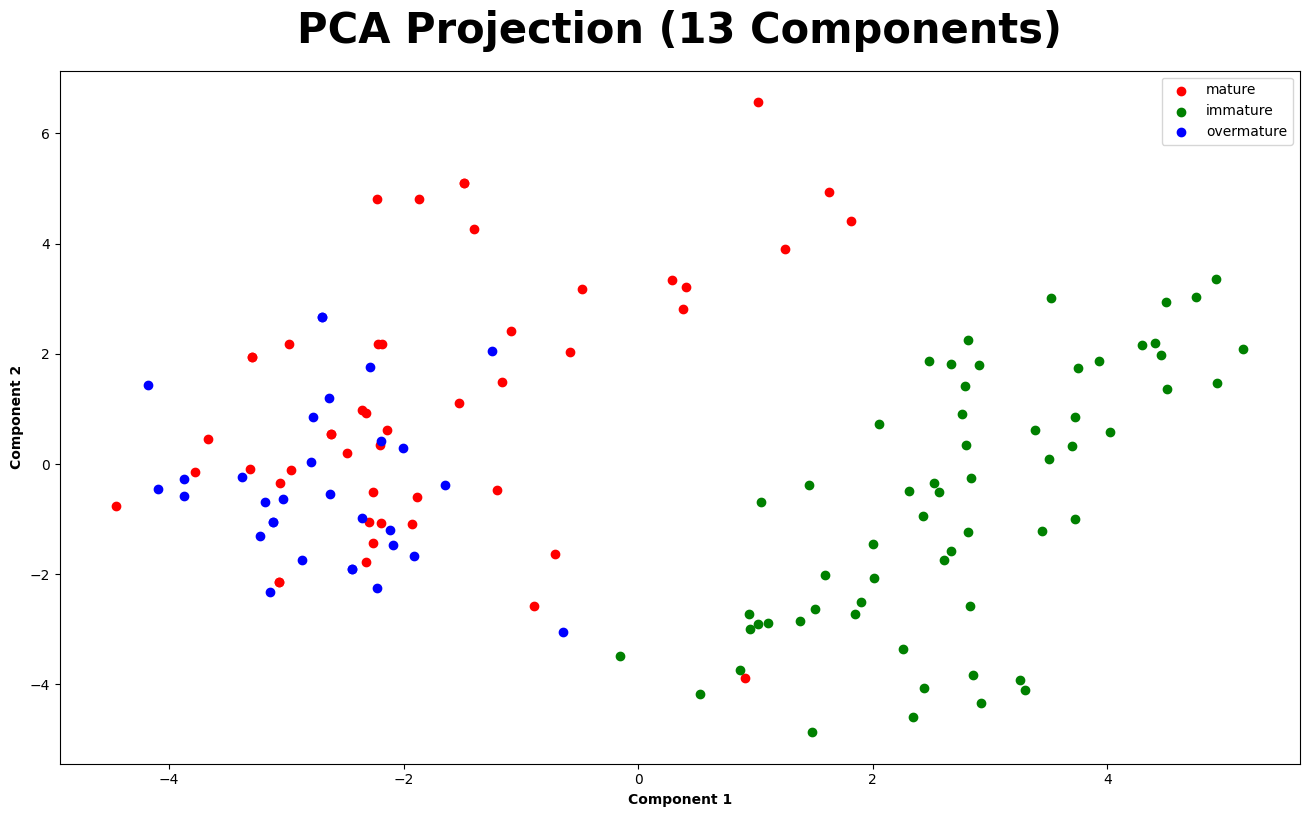

In [17]:
labels = df_13_cut['class_name'].values.tolist()

# Create a dictionary to map labels to colors for plotting
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

x = pca_result[:, 0]
y = pca_result[:, 1]

unique_labels = set(labels)

fig, ax = plt.subplots(figsize=(16, 9))
for label in unique_labels:
    indices = np.where(np.array(labels) == label)
    ax.scatter(x[indices], y[indices], c=label_colors[label], label=label)

plt.title('PCA Projection (13 Components)', fontsize=30, pad=20, fontweight='bold')
plt.xlabel('Component 1', fontweight='bold')
plt.ylabel('Component 2', fontweight='bold')

# Add a legend
ax.legend()

# Show the plot
plt.show()

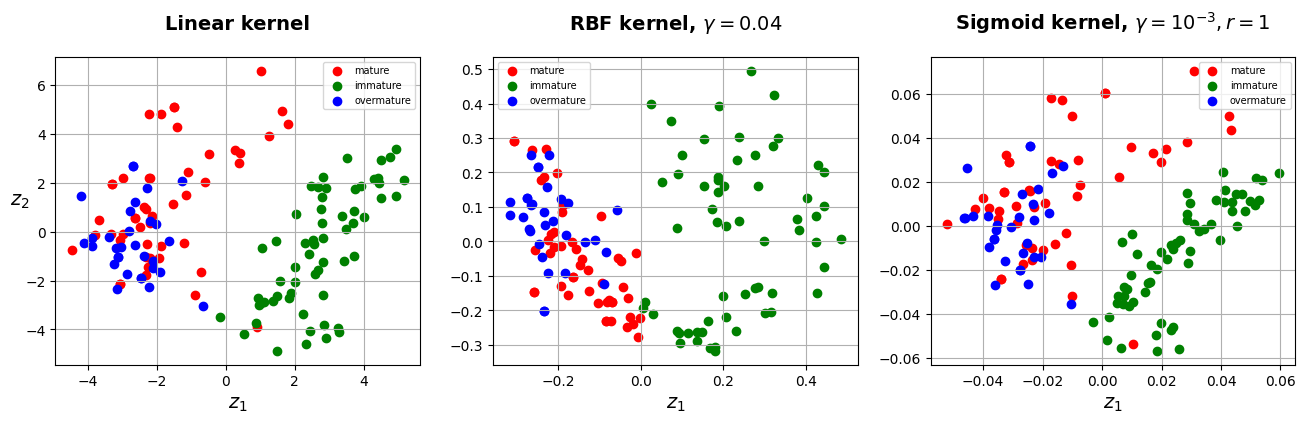

In [35]:
lin_pca = KernelPCA(n_components=13, kernel="linear")
rbf_pca = KernelPCA(n_components=13, kernel="rbf", gamma=0.0433)
sig_pca = KernelPCA(n_components=13, kernel="sigmoid", gamma=0.001)

unique_labels = set(labels)
label_colors = {'mature': 'red', 'immature': 'green', 'overmature': 'blue'}

plt.figure(figsize=(16, 4))
for subplot, pca, title in((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    reduced = pca.fit_transform(flattened_data)

    x = reduced[:, 0]
    y = reduced[:, 1]
    
    plt.subplot(subplot)
    for label in unique_labels:
        indices = np.where(np.array(labels) == label)
        plt.scatter(x[indices], y[indices], c=label_colors[label], label=label)

    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.xlabel("$z_1$", fontsize=14)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=14, rotation=0)
    plt.legend(fontsize=7)
    plt.grid()
plt.show()

In [57]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

sil_score = []
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

for pca in(lin_pca, rbf_pca, sig_pca):
    reduced = pca.fit_transform(flattened_data)

    x = reduced[:, 0]
    y = reduced[:, 1]

    combined = np.column_stack((x, y))
    
    sil_score.append(silhouette_score(combined, numeric_labels))

sil_score_data = {'Kernel' : ['Linear', 'RBF', 'Sigmoid'],
                  'Silhouette Score' : sil_score}
df_sil_score = pd.DataFrame(sil_score_data)
df_sil_score

,Kernel,Silhouette Score
0,Linear,0.205446
1,RBF,0.179289
2,Sigmoid,0.194963
